In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


sc.logging.print_header()

adata = sc.read_h5ad("../nbl(UQlabel).h5ad")  ###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [82]:
adata

AnnData object with n_obs × n_vars = 165813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'n

In [3]:
# Compute UMAP
sc.tl.umap(adata)

# The UMAP coordinates will be stored in adata.obsm['X_umap']

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


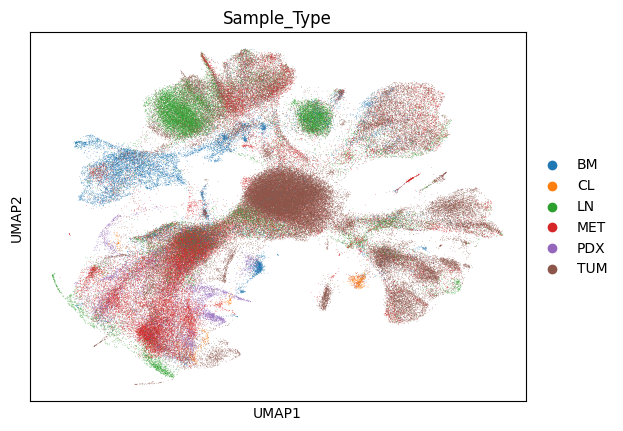

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


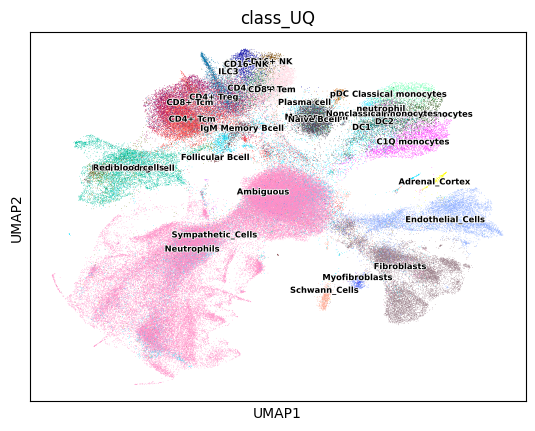

In [4]:
# Now you can plot using the umap() function:
sc.pl.umap(adata, color=["Sample_Type"])
sc.pl.umap(
    adata,
    color=["class_UQ"],
    legend_fontsize="6",
    legend_fontoutline=1,
    legend_loc="on data",
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


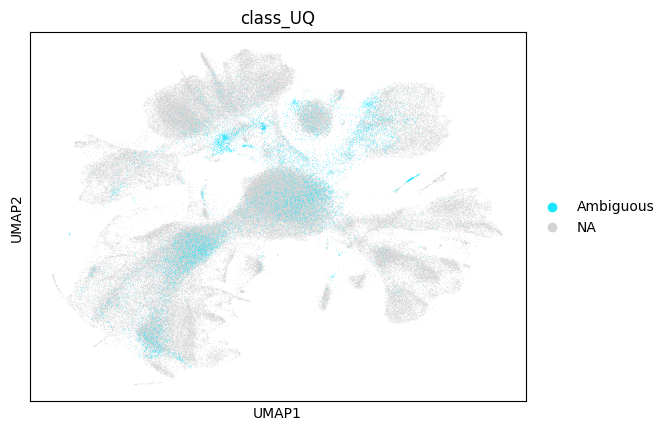

In [5]:
sc.pl.umap(adata, color=["class_UQ"], groups="Ambiguous")

In [6]:
adata.obs.class_UQ.cat.categories

Index(['Adrenal_Cortex', 'Ambiguous', 'C1Q monocytes', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ Treg', 'CD8+ Tcm', 'CD8+ Tem', 'CD16+ NK', 'CD16- NK',
       'Classical monocytes', 'DC1', 'DC2', 'Endothelial_Cells', 'Fibroblasts',
       'Follicular Bcell', 'ILC3', 'IgM Memory Bcell',
       'Intermediate monocytes', 'Memory Bcell', 'Myofibroblasts',
       'Naive Bcell', 'Neutrophils', 'Nonclassical monocytes', 'Plasma cell',
       'Proliferating Tcell', 'Red blood cells', 'Schwann_Cells',
       'Sympathetic_Cells', 'neutrophil', 'pDC'],
      dtype='object')

# subsetting unknown fibroblast cells for further annotation

In [7]:
##edata for all kinds of fibroblast cells
fdata = adata[(adata.obs["class_UQ"].isin(["Fibroblasts", "Myofibroblasts"]))].copy()
fdata

AnnData object with n_obs × n_vars = 12314 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nF

In [8]:
np.max(fdata.X)

8.102597

In [9]:
np.min(fdata.X)

0.0

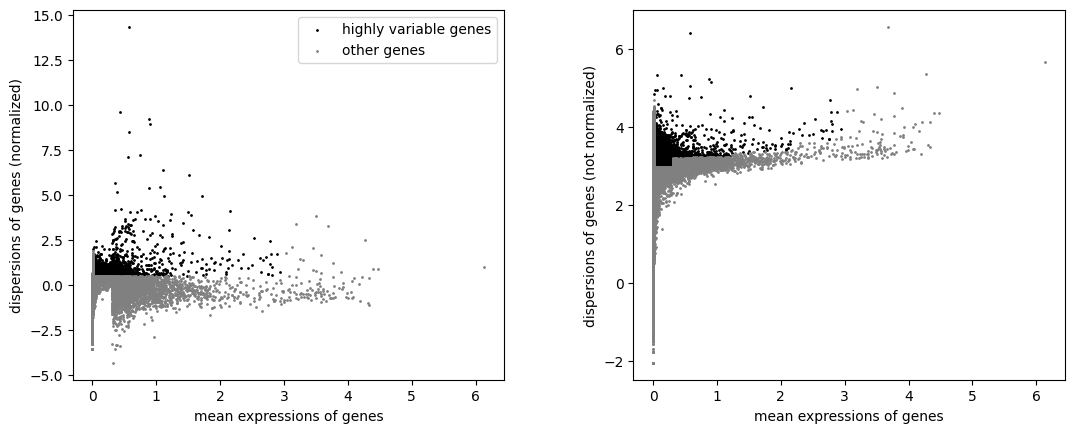

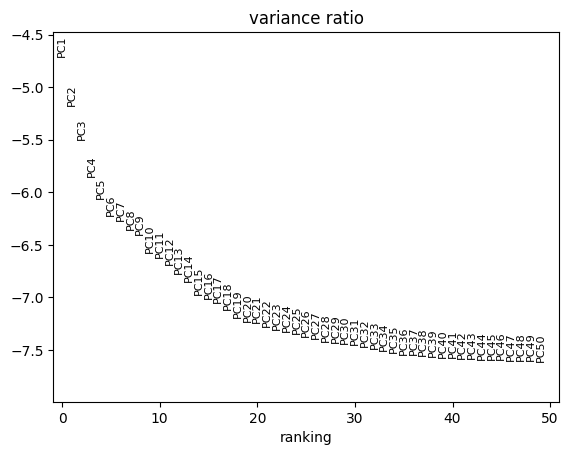

2023-07-06 07:54:18,204 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-06 07:54:24,957 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-06 07:54:25,015 - harmonypy - INFO - Iteration 1 of 10
2023-07-06 07:54:30,438 - harmonypy - INFO - Iteration 2 of 10
2023-07-06 07:54:33,612 - harmonypy - INFO - Iteration 3 of 10
2023-07-06 07:54:36,272 - harmonypy - INFO - Iteration 4 of 10
2023-07-06 07:54:38,525 - harmonypy - INFO - Iteration 5 of 10
2023-07-06 07:54:41,191 - harmonypy - INFO - Iteration 6 of 10
2023-07-06 07:54:44,439 - harmonypy - INFO - Iteration 7 of 10
2023-07-06 07:54:46,926 - harmonypy - INFO - Converged after 7 iterations


In [10]:
try:
    fdata.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata)
fdata.raw = fdata
fdata = fdata[:, fdata.var.highly_variable]
sc.pp.regress_out(fdata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(fdata, max_value=10)
sc.tl.pca(fdata, svd_solver="arpack")
sc.pl.pca_variance_ratio(fdata, log=True, n_pcs=50)
sc.external.pp.harmony_integrate(fdata, key="Sample_ID")
sc.pp.neighbors(fdata, use_rep="X_pca_harmony", n_neighbors=10, n_pcs=40)
sc.tl.umap(fdata, min_dist=0.3)

In [26]:
fdata = sc.read_h5ad("fibro_subset01.h5ad")  ###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


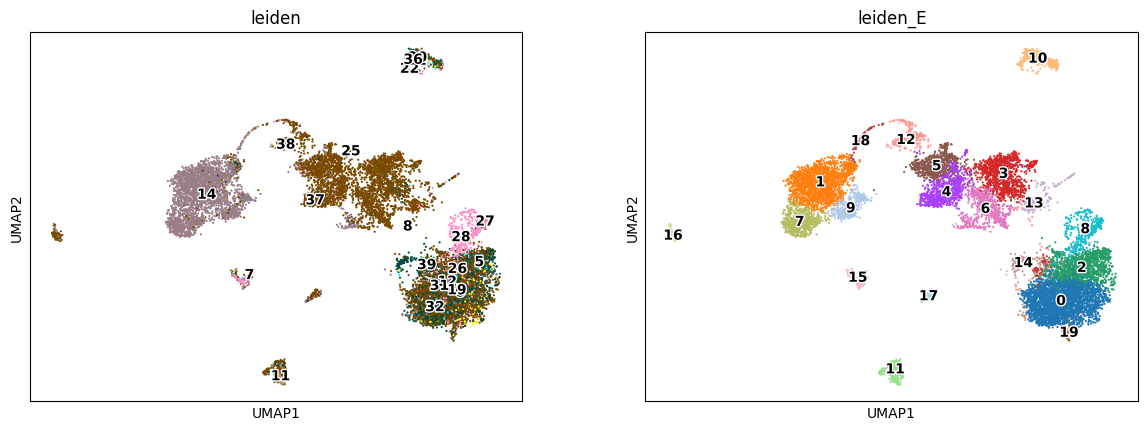

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


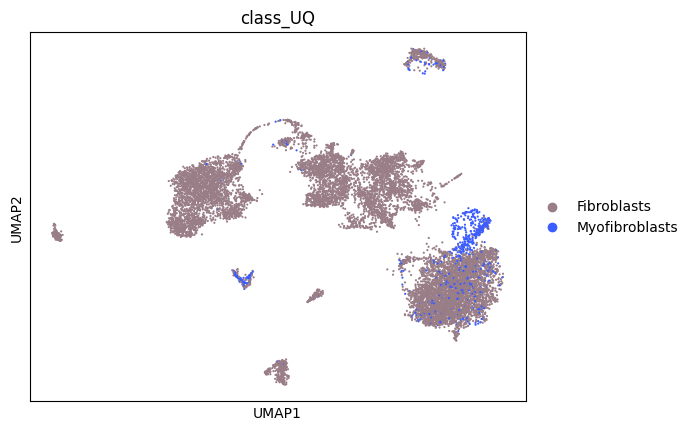

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


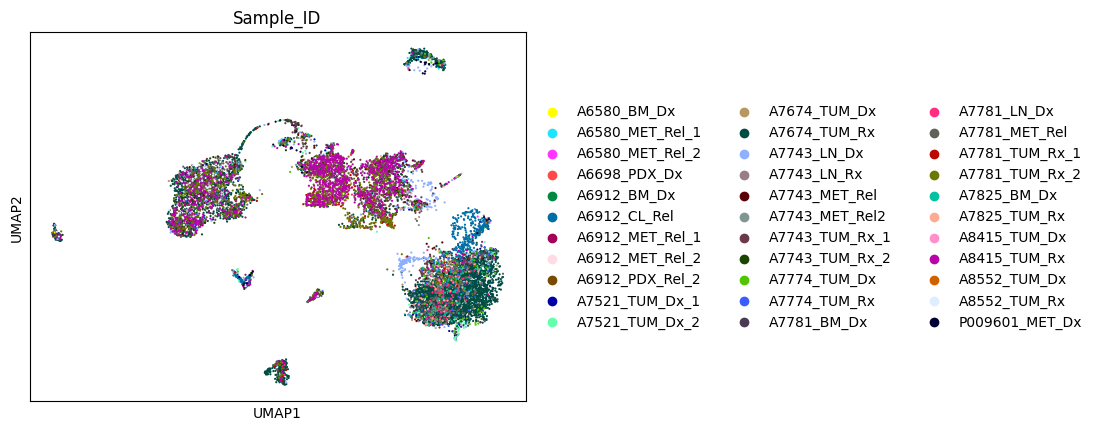

In [27]:
sc.tl.leiden(fdata, key_added="leiden_E")
sc.pl.umap(
    fdata, color=["leiden", "leiden_E"], legend_fontoutline=2, legend_loc="on data"
)
sc.pl.umap(fdata, color=["class_UQ"])
sc.pl.umap(fdata, color=["Sample_ID"])

In [28]:
sc.tl.rank_genes_groups(fdata, groupby="leiden_E", method="wilcoxon")

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


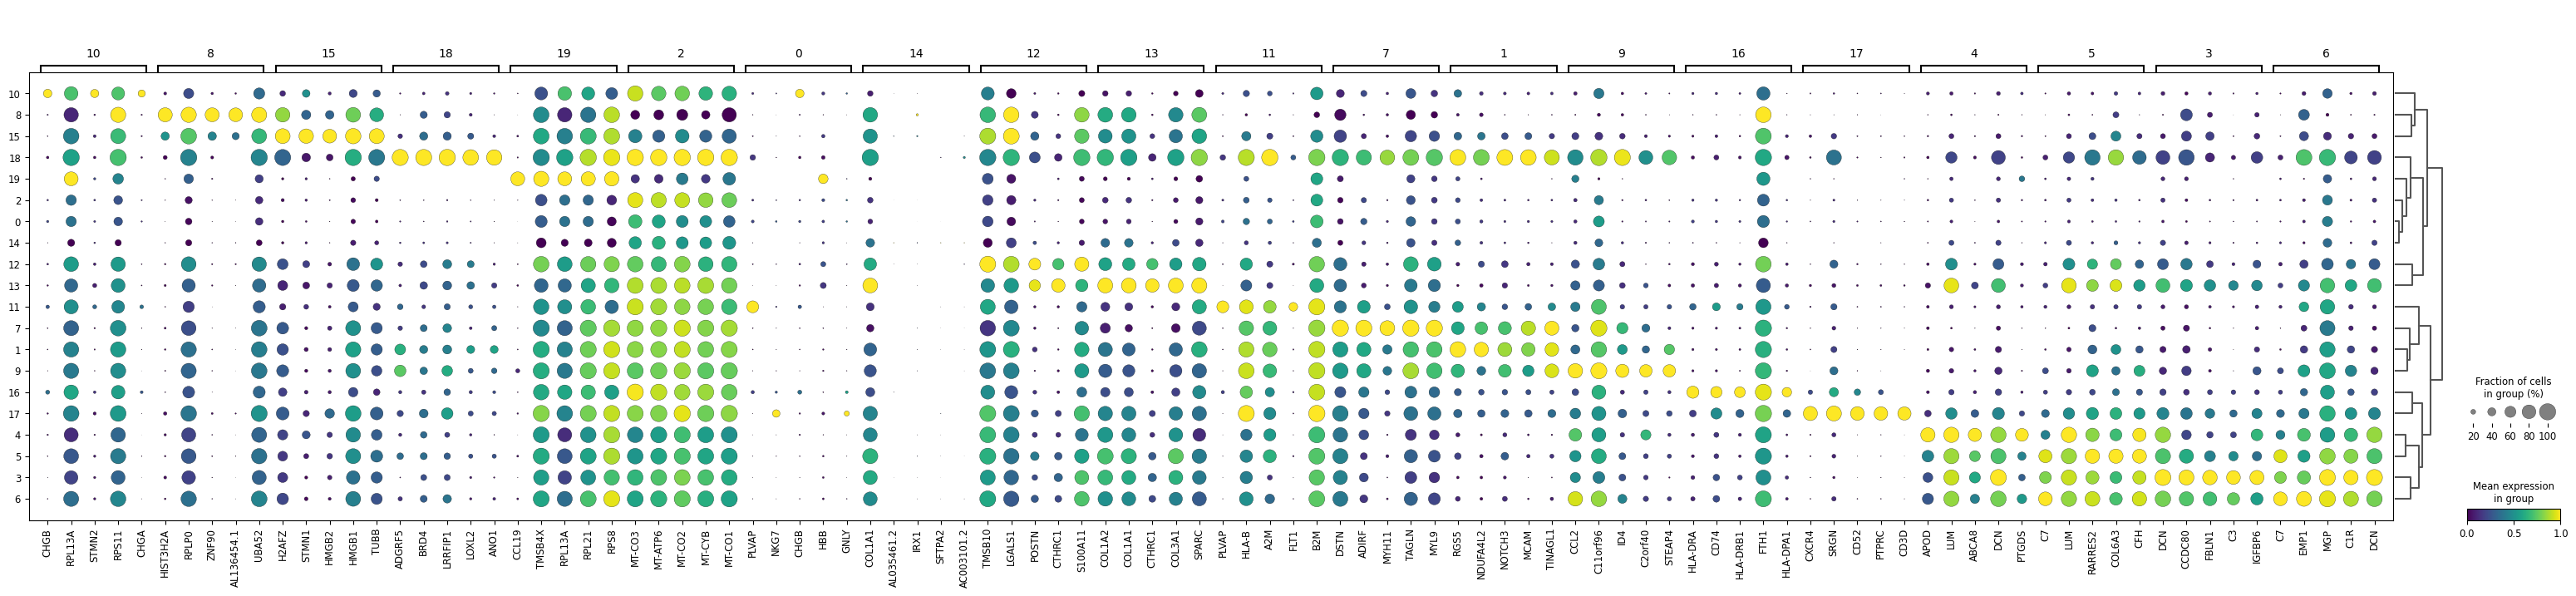

In [29]:
sc.pl.rank_genes_groups_dotplot(
    fdata, n_genes=5, min_logfoldchange=0.5, standard_scale="var", color_map="viridis"
)

In [14]:
# fdata.write('fibro_subset01.h5ad') (File has been saved before)

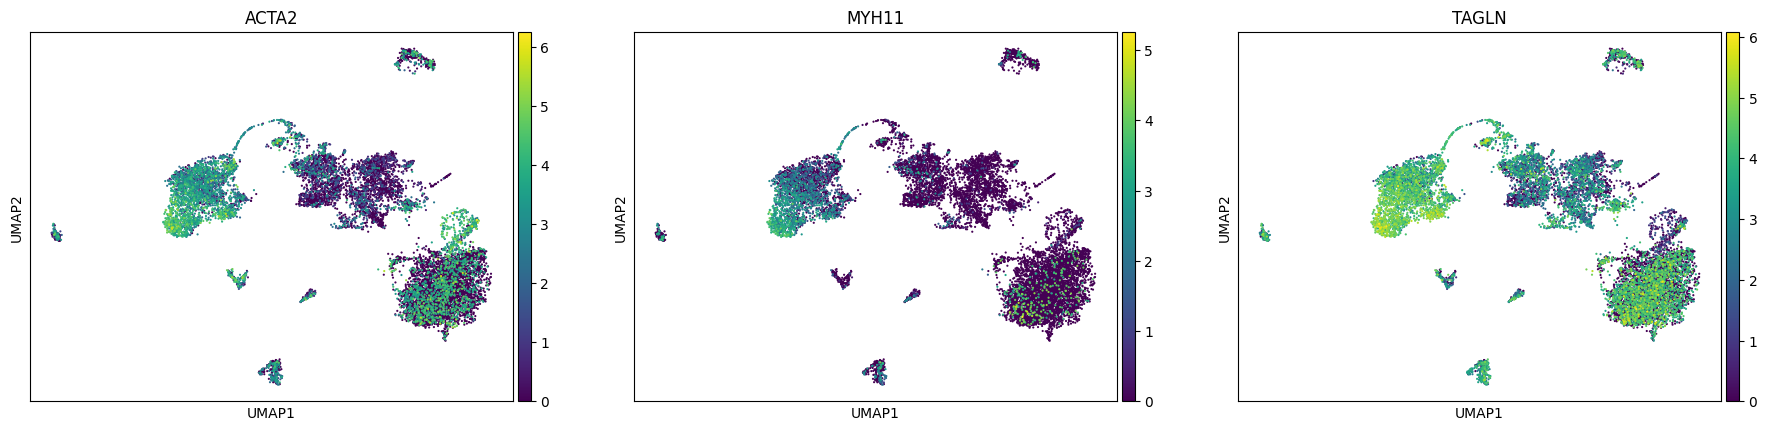

In [30]:
sc.pl.umap(fdata, color=["ACTA2", "MYH11", "TAGLN"])

In [ ]:
# AMBIGUOUS clusters: 10, 17, 11, 19
# Cluster16 - potentially proliferating cells? ambiguous group - contains non-histone chromosomal high mobility group protein
# 2 - Ambiguous - Mitochrondrial
# 10 - AMBIGUOUS - CHGB- tyrosine-sulfated secretory protein abundant in peptidergic endocrine cells and neurons; CHGA - found in secretory vesicles of neurons and endocrine cells; STMN2 - neuronal growth and osteogenesis
# 11 - Vascular Endothelial (FLT1)
# 15 - T cells
# 16 - Proliferating Endothelial
# 18 - AMBIGIOUS - ADGRF5: Predicted to act upstream of or within several processes, including glomerular filtration; pharyngeal arch artery morphogenesis; and surfactant homeostasis. Located in cell surface and cytoplasmic vesicle; potentially epithelial;
#### BRD4: nonspecific; LRRFIP1: prognostic biomarker of glioma; LOXL2: <- same as LRRFIP1; ANO1: GIT associated
# 19 - AMBIGIOUS - inflammatory marker: CCL19, TMSB4X - regeneration, tissue repair; + ribosomal markers
##20 - HSPs - all heat shock proteins
##21 - Glial cells -> CDH19: marker for glioblastoma stem-like cells; CRYAB: involved in reactive astrogliosis in traumatic brain injuries; S100B: peripheral blood brain barrier marker, glial-specific, expressed primarily by astrocytes


# 14 - Fibroblast
# 13 - Fibroblast
# 12 - Endometrial ;TMSB10 - Non-specific - Mixed function (mainly); LGALS1; S100A11: endometrial
# 9 - immune?
# 8 - AMBIGUOUS - ribosomal protein, dna binding trans factor
# 7 - myofibroblasts: Adipose, Smooth muscle, fibroblasts
# 6 - Fibroblasts; - Epithelial, mesenchymal glioma, Fibroblasts
# 5 - Fibroblast: APOD - fibroblast
# 4 - Fibroblast
# 3 - Fibroblast
# 1 - Vascular smooth muscle cells*** / pericytes (RGS5), MCAM - mural cells
# 0 - Expressed by tumor cells ??

In [51]:
pd.DataFrame(fdata.uns["rank_genes_groups"]["names"]).head(5)

0         1        2       3      4        5     6      7           8  \
0    B2M      RGS5   MT-CO3     DCN   APOD       C7    C7   DSTN    HIST3H2A   
1   TPT1  NDUFA4L2  MT-ATP6  CCDC80    LUM      LUM  EMP1  ADIRF       RPLP0   
2   RPS2    NOTCH3   MT-CO2   FBLN1  ABCA8  RARRES2   MGP  MYH11       ZNF90   
3  RPL13      MCAM   MT-CYB      C3    DCN   COL6A3   C1R  TAGLN  AL136454.1   
4  RPS3A   TINAGL1   MT-CO1  IGFBP6  PTGDS      CFH   DCN   MYL9       UBA52   

          9      10     11       12      13       14     15        16     17  \
0      CCL2    CHGB  PLVAP   TMSB10  COL1A2      VIM  H2AFZ   HLA-DRA  CXCR4   
1  C11orf96  RPL13A  HLA-B   LGALS1  COL1A1   MT-CO1  STMN1      CD74   SRGN   
2       ID4   STMN2    A2M    POSTN  CTHRC1   COL1A1  HMGB2  HLA-DRB1   CD52   
3   C2orf40   RPS11   FLT1   CTHRC1  COL3A1  MT-ATP6  HMGB1      FTH1  PTPRC   
4    STEAP4    CHGA    B2M  S100A11   SPARC     TPT1   TUBB  HLA-DPA1   CD3D   

        18      19  
0   ADGRF5   CCL19  
1     BRD4  TMSB4X  
2  LRRFIP1  RPL13A  
3    LOXL2   RPL21  
4     ANO1    RPS8

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


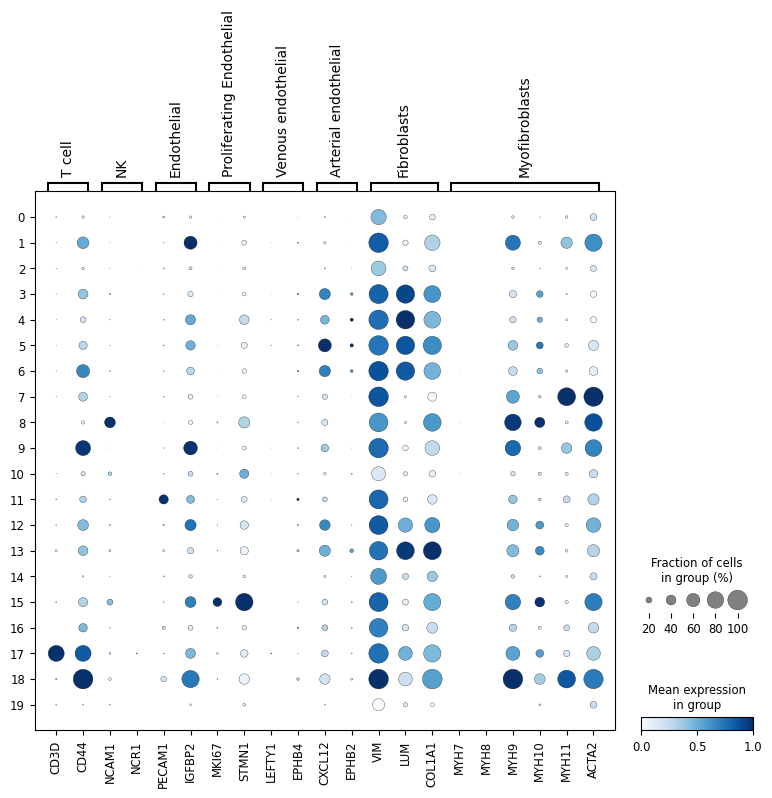

In [31]:
# To map the identified clusters to a cell type annotation label

fibroannot = {
    "0": "Ambiguous",
    "1": "Mural cells",
    "2": "Ambiguous",
    "3": "Fibroblast",
    "4": "Fibroblast",
    "5": "Fibroblast",
    "6": "Fibroblast",
    "7": "Mural cells",
    "8": "Ambiguous",
    "9": "Ambiguous",
    "10": "Ambiguous",
    "11": "Ambiguous",
    "12": "Ambiguous",
    "13": "Fibroblast",
    "14": "Fibroblast",
    "15": "Ambiguous",
    "16": "Ambiguous",
    "17": "Ambiguous",
    "18": "Mural cells",
    "19": "Ambiguous",
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata.obs["cell type"] = fdata.obs["leiden_E"].map(fibroannot).astype("category")

cellmarker_dict = {
    "T cell": ["CD3D", "CD44"],
    "NK": ["NCAM1", "NCR1"],
    "Endothelial": ["PECAM1", "IGFBP2"],
    "Proliferating Endothelial": ["MKI67", "STMN1"],
    "Venous endothelial": ["LEFTY1", "EPHB4"],
    "Arterial endothelial": ["CXCL12", "EPHB2"],
    "Fibroblasts": ["VIM", "LUM", "COL1A1"],
    "Myofibroblasts": ["MYH7", "MYH8", "MYH9", "MYH10", "MYH11", "ACTA2"],
}
sc.pl.dotplot(
    fdata, cellmarker_dict, groupby="leiden_E", standard_scale="var", color_map="Blues"
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


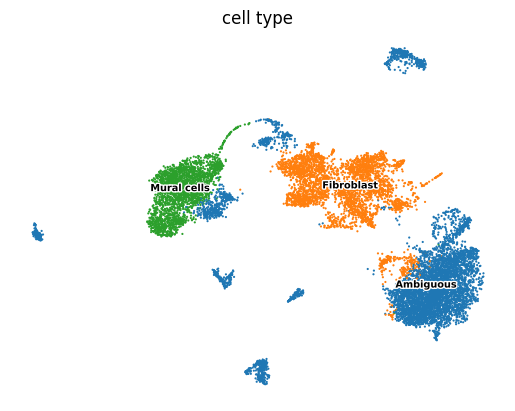

In [32]:
sc.pl.umap(
    fdata,
    color="cell type",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=7,
    legend_fontoutline=2,
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


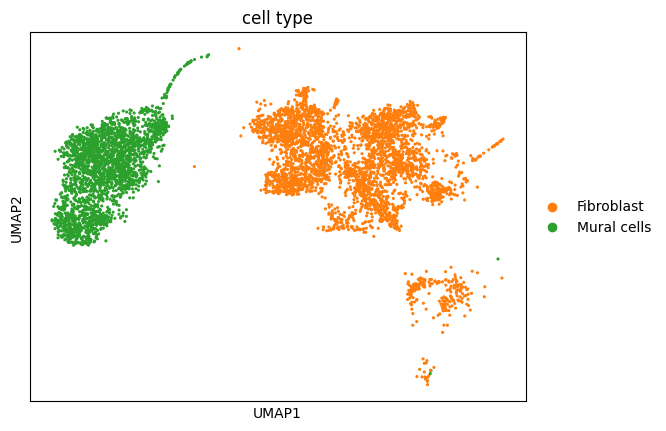

In [33]:
fdata2 = fdata[fdata.obs["cell type"].isin(["Fibroblast", "Mural cells"])].copy()
sc.pl.umap(fdata2, color="cell type")

In [34]:
fdata2.raw = fdata2

In [35]:
fdata2 = fdata2.raw.to_adata()
fdata2

AnnData object with n_obs × n_vars = 5896 × 7568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

# Repeat everything from the start to clean up the fibroblast clusters (2nd iteration)

In [36]:
sc.tl.umap(fdata2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


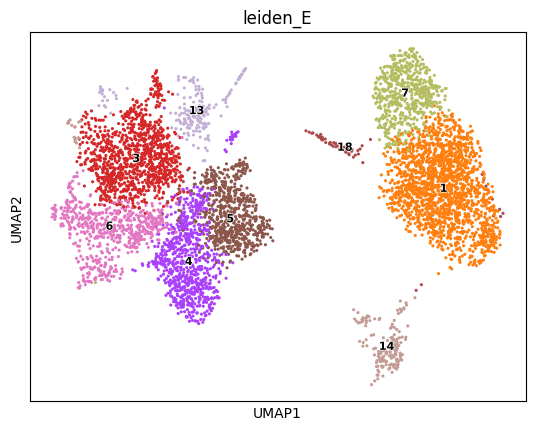

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


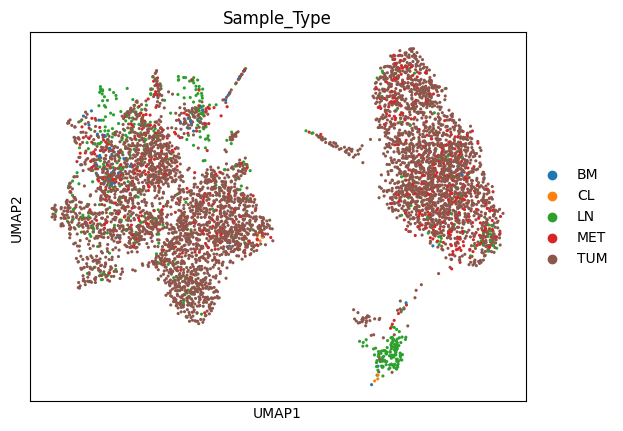

In [37]:
sc.pl.umap(
    fdata2,
    color=["leiden_E"],
    legend_fontsize="8",
    legend_fontoutline=1,
    legend_loc="on data",
)
sc.pl.umap(fdata2, color=["Sample_Type"])

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


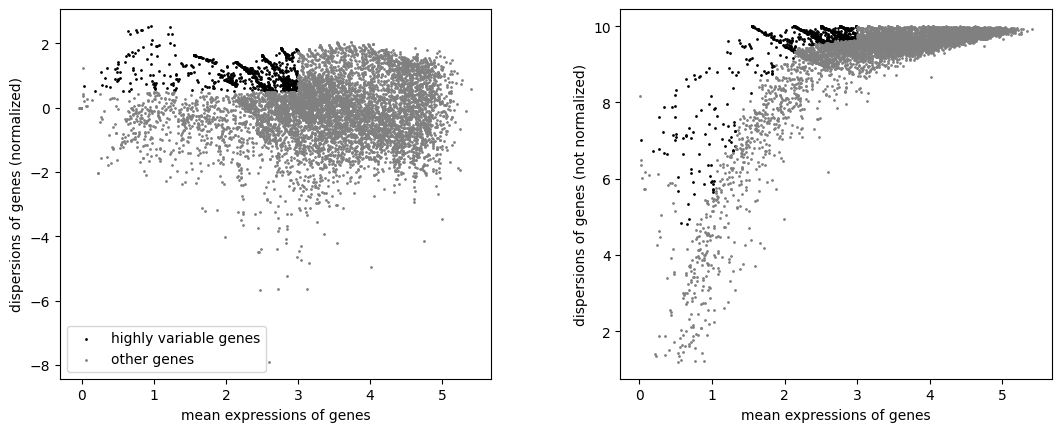

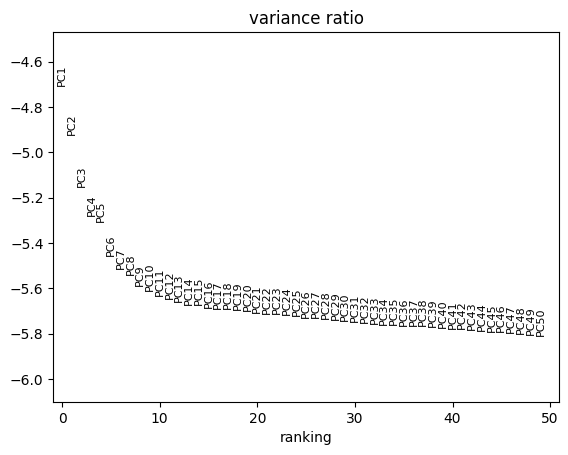

2023-07-14 14:39:30,080 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-14 14:39:33,010 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-14 14:39:33,031 - harmonypy - INFO - Iteration 1 of 10
2023-07-14 14:39:34,551 - harmonypy - INFO - Iteration 2 of 10
2023-07-14 14:39:35,656 - harmonypy - INFO - Iteration 3 of 10
2023-07-14 14:39:36,585 - harmonypy - INFO - Iteration 4 of 10
2023-07-14 14:39:37,215 - harmonypy - INFO - Iteration 5 of 10
2023-07-14 14:39:38,016 - harmonypy - INFO - Iteration 6 of 10
2023-07-14 14:39:38,670 - harmonypy - INFO - Iteration 7 of 10
2023-07-14 14:39:39,443 - harmonypy - INFO - Iteration 8 of 10
2023-07-14 14:39:40,102 - harmonypy - INFO - Iteration 9 of 10
2023-07-14 14:39:40,904 - harmonypy - INFO - Iteration 10 of 10
2023-07-14 14:39:41,684 - harmonypy - INFO - Stopped before convergence


In [38]:
try:
    fdata2.uns.pop("log1p")
except:
    pass
# check here if you fdata2.X is scaled or not
# np.min(fdata2.X)
# np.max(fdata2.X)
sc.pp.highly_variable_genes(fdata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata2)
fdata2.raw = fdata2
fdata2 = fdata2[:, fdata2.var.highly_variable]
sc.pp.regress_out(fdata2, ["total_counts", "pct_counts_mt"])
sc.pp.scale(fdata2, max_value=10)
sc.tl.pca(fdata2, svd_solver="arpack")
sc.pl.pca_variance_ratio(fdata2, log=True, n_pcs=50)
sc.external.pp.harmony_integrate(fdata2, key="Sample_ID")
sc.pp.neighbors(fdata2, use_rep="X_pca_harmony", n_neighbors=10, n_pcs=40)
sc.tl.umap(fdata2, min_dist=0.3)

In [39]:
fdata2 = sc.read_h5ad(
    "fibro_subset02.h5ad"
)  ###(prior steps do not need to be run after importing this re-annotated labels)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


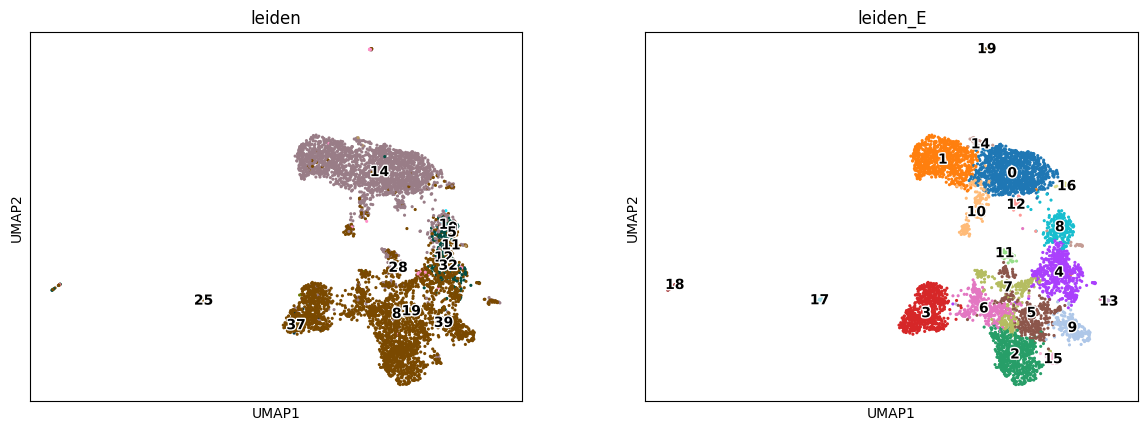

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


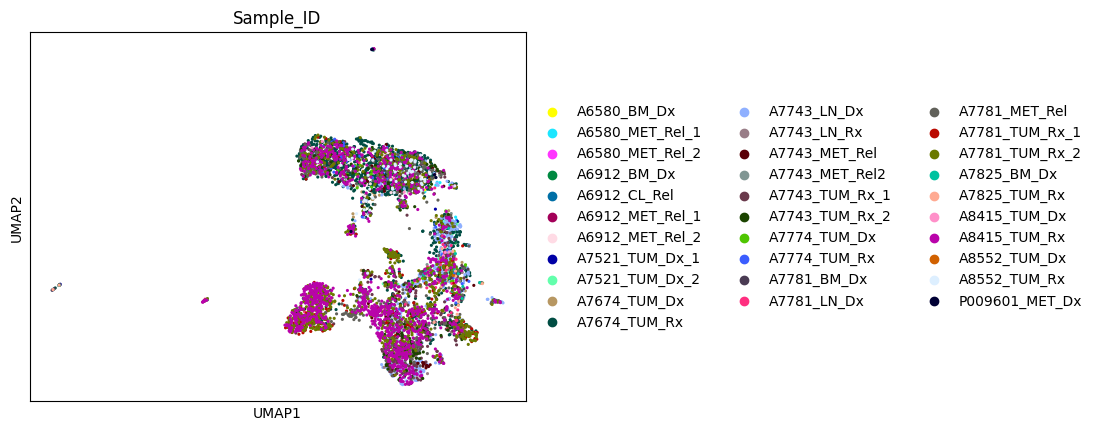

In [40]:
sc.tl.leiden(fdata2, key_added="leiden_E")
sc.pl.umap(
    fdata2, color=["leiden", "leiden_E"], legend_fontoutline=2, legend_loc="on data"
)
sc.pl.umap(fdata2, color=["Sample_ID"])

In [81]:
# fdata2.write('fibro_subset02.h5ad')

In [22]:
sc.tl.rank_genes_groups(fdata2, groupby="leiden_E", method="wilcoxon")

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


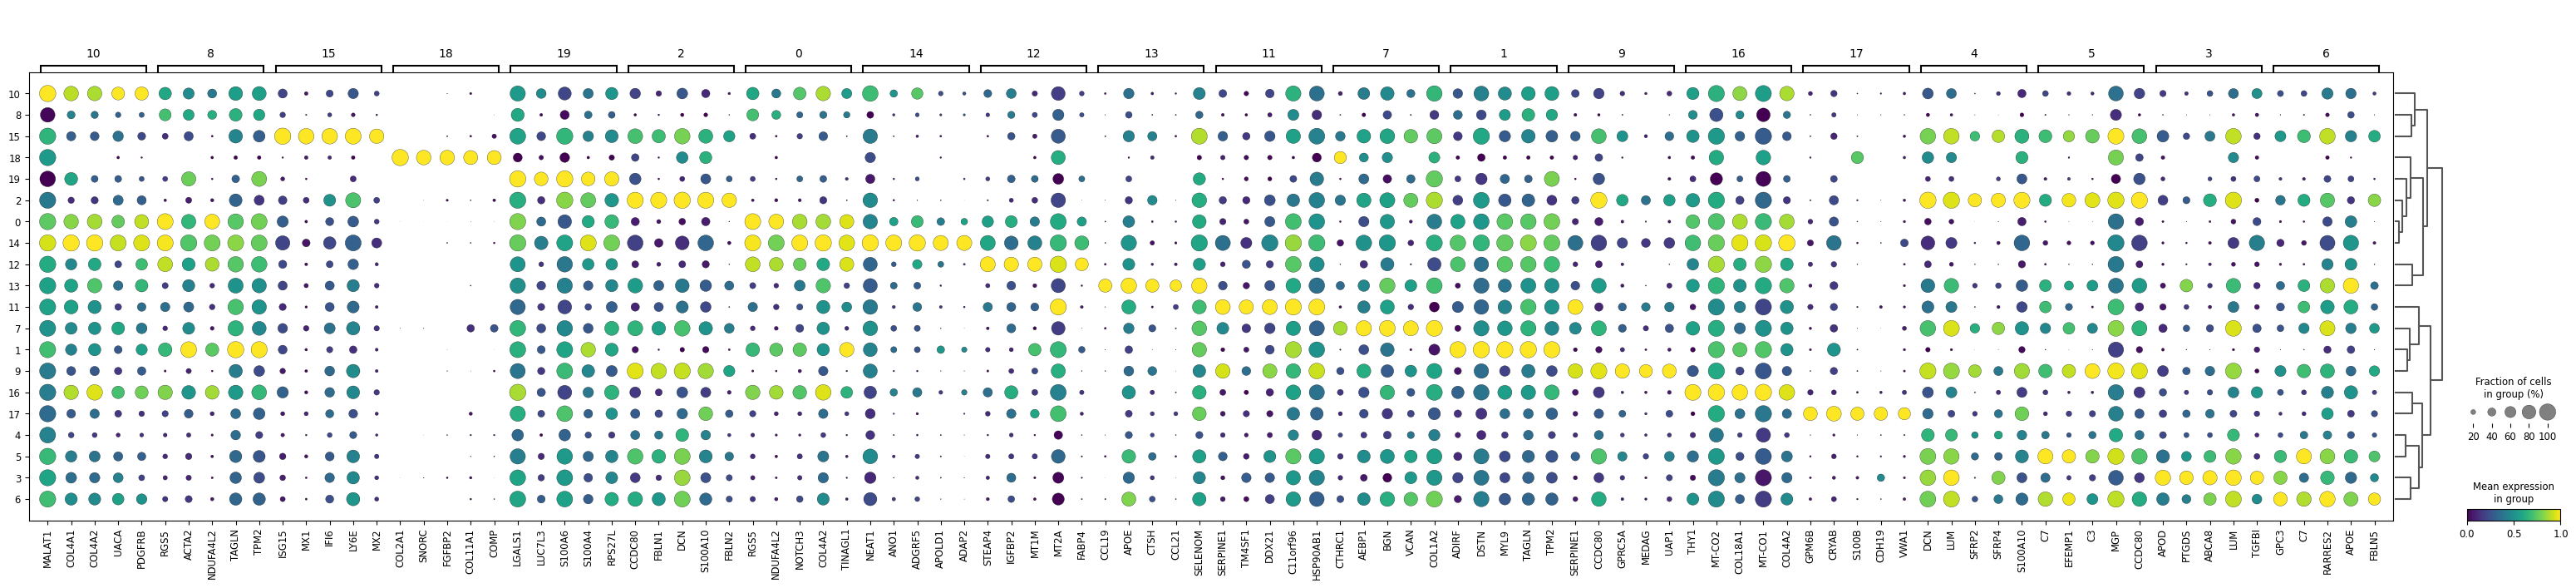

In [23]:
sc.pl.rank_genes_groups_dotplot(
    fdata2, n_genes=5, min_logfoldchange=0.5, standard_scale="var", color_map="viridis"
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


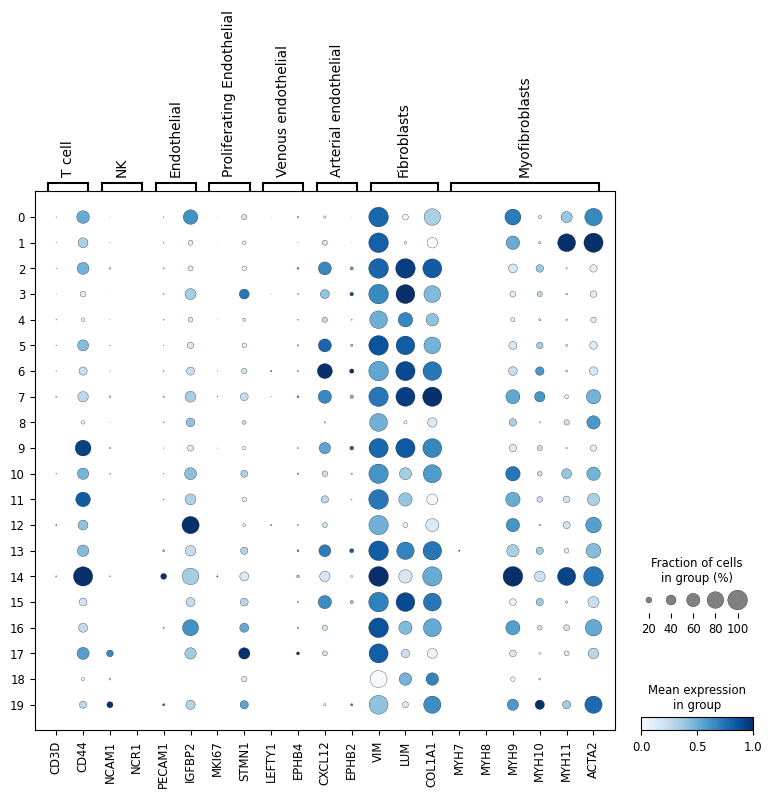

In [41]:
sc.pl.dotplot(
    fdata2, cellmarker_dict, groupby="leiden_E", standard_scale="var", color_map="Blues"
)

In [42]:
pd.DataFrame(fdata2.uns["rank_genes_groups"]["names"]).head(5)

0         1        2       3      4        5     6      7           8  \
0    B2M      RGS5   MT-CO3     DCN   APOD       C7    C7   DSTN    HIST3H2A   
1   TPT1  NDUFA4L2  MT-ATP6  CCDC80    LUM      LUM  EMP1  ADIRF       RPLP0   
2   RPS2    NOTCH3   MT-CO2   FBLN1  ABCA8  RARRES2   MGP  MYH11       ZNF90   
3  RPL13      MCAM   MT-CYB      C3    DCN   COL6A3   C1R  TAGLN  AL136454.1   
4  RPS3A   TINAGL1   MT-CO1  IGFBP6  PTGDS      CFH   DCN   MYL9       UBA52   

          9      10     11       12      13       14     15        16     17  \
0      CCL2    CHGB  PLVAP   TMSB10  COL1A2      VIM  H2AFZ   HLA-DRA  CXCR4   
1  C11orf96  RPL13A  HLA-B   LGALS1  COL1A1   MT-CO1  STMN1      CD74   SRGN   
2       ID4   STMN2    A2M    POSTN  CTHRC1   COL1A1  HMGB2  HLA-DRB1   CD52   
3   C2orf40   RPS11   FLT1   CTHRC1  COL3A1  MT-ATP6  HMGB1      FTH1  PTPRC   
4    STEAP4    CHGA    B2M  S100A11   SPARC     TPT1   TUBB  HLA-DPA1   CD3D   

        18      19  
0   ADGRF5   CCL19  
1     BRD4  TMSB4X  
2  LRRFIP1  RPL13A  
3    LOXL2   RPL21  
4     ANO1    RPS8

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


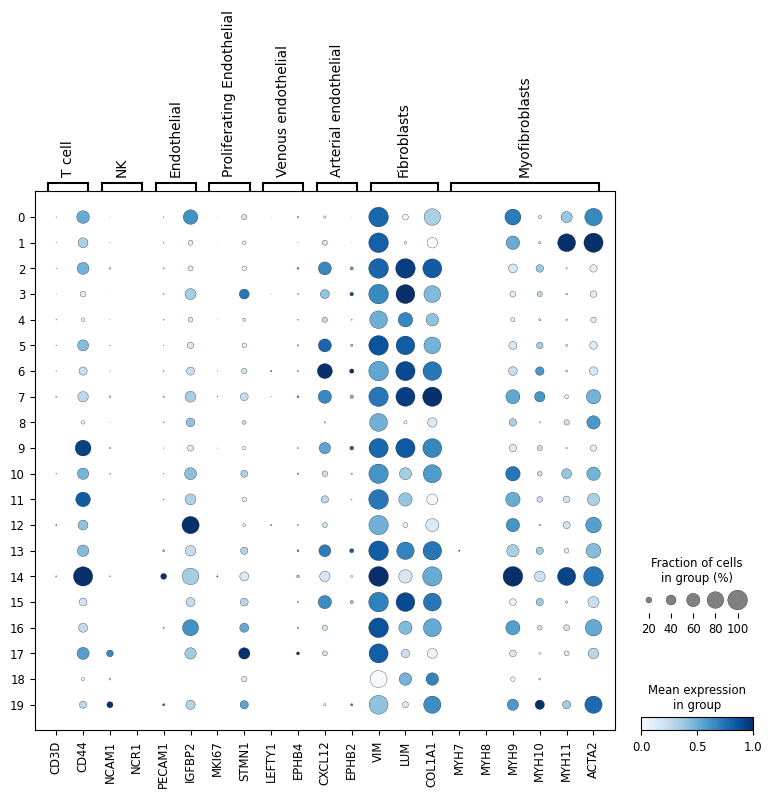

In [52]:
fibroannot2 = {
    "0": "Mural cells",
    "1": "Mural cells",
    "2": "Fibroblast",
    "3": "Fibroblast",
    "4": "Fibroblast",
    "5": "Fibroblast",
    "6": "Fibroblast",
    "7": "Fibroblast",
    "8": "Mural cells",
    "9": "Fibroblast",
    "10": "Fibroblast",
    "11": "Fibroblast",
    "12": "Ambiguous",
    "13": "Ambiguous",
    "14": "Mural cells",
    "15": "Fibroblast",
    "16": "Ambiguous",
    "17": "Ambiguous",
    "18": "Ambiguous",
    "19": "Fibroblast",
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata2.obs["cell type"] = fdata2.obs["leiden_E"].map(fibroannot2).astype("category")

sc.pl.dotplot(
    fdata2, cellmarker_dict, groupby="leiden_E", standard_scale="var", color_map="Blues"
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


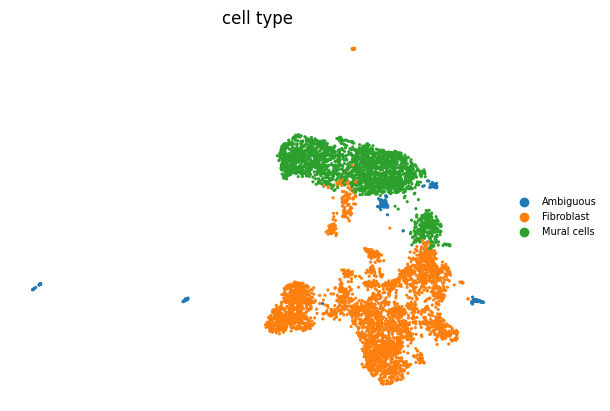

In [53]:
sc.pl.umap(
    fdata2, color="cell type", frameon=False, legend_fontsize=7, legend_fontoutline=2
)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


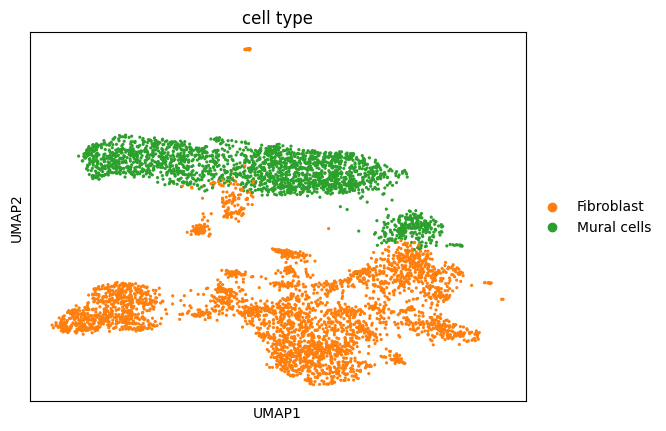

In [63]:
fdata3 = fdata2[fdata2.obs["cell type"].isin(["Fibroblast", "Mural cells"])].copy()
sc.pl.umap(fdata3, color="cell type")

In [66]:
fdata3.write("fibro_subset03.h5ad")

In [84]:
fdata3.raw = fdata3

In [85]:
fdata3 = fdata3.raw.to_adata()
fdata3

AnnData object with n_obs × n_vars = 5724 × 5302
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

# Repeat everything from the start to clean up the fibroblast clusters (3nd iteration)

In [67]:
sc.tl.umap(fdata3)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


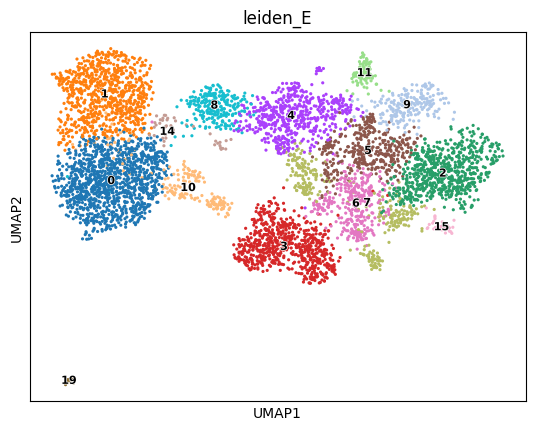

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


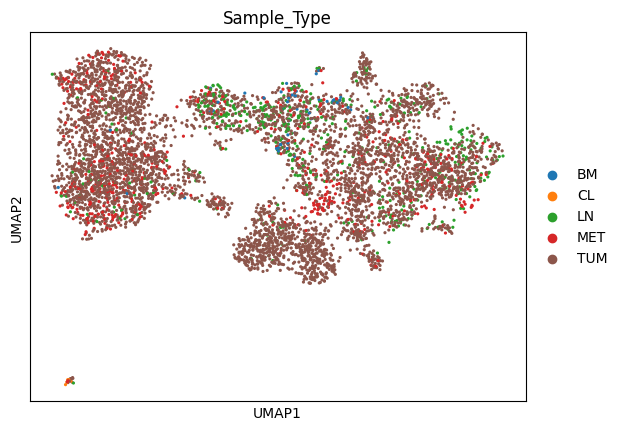

In [68]:
sc.pl.umap(
    fdata3,
    color=["leiden_E"],
    legend_fontsize="8",
    legend_fontoutline=1,
    legend_loc="on data",
)
sc.pl.umap(fdata3, color=["Sample_Type"])

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


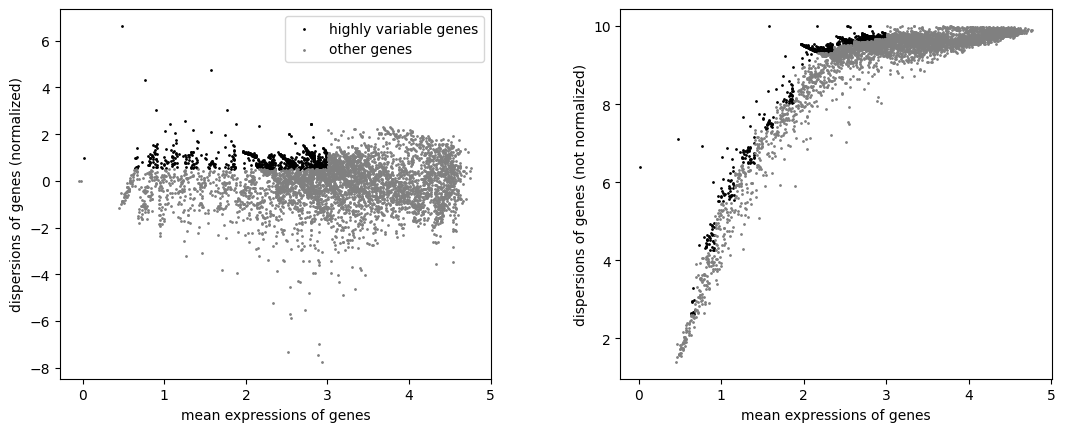

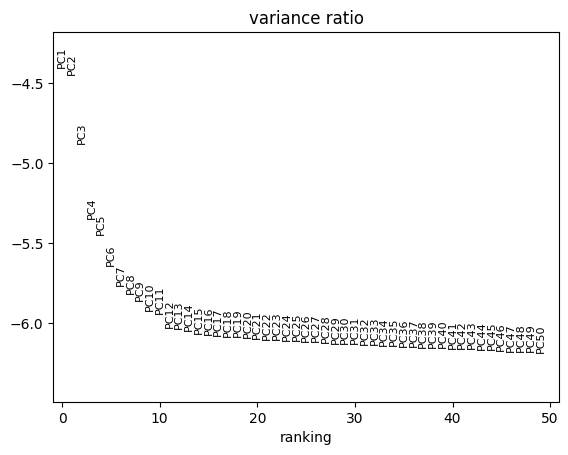

2023-07-14 16:59:42,053 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-14 16:59:45,716 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-14 16:59:45,746 - harmonypy - INFO - Iteration 1 of 10
2023-07-14 16:59:48,481 - harmonypy - INFO - Iteration 2 of 10
2023-07-14 16:59:49,894 - harmonypy - INFO - Iteration 3 of 10
2023-07-14 16:59:50,950 - harmonypy - INFO - Iteration 4 of 10
2023-07-14 16:59:51,651 - harmonypy - INFO - Iteration 5 of 10
2023-07-14 16:59:52,332 - harmonypy - INFO - Iteration 6 of 10
2023-07-14 16:59:52,945 - harmonypy - INFO - Iteration 7 of 10
2023-07-14 16:59:53,536 - harmonypy - INFO - Iteration 8 of 10
2023-07-14 16:59:54,219 - harmonypy - INFO - Iteration 9 of 10
2023-07-14 16:59:54,755 - harmonypy - INFO - Iteration 10 of 10
2023-07-14 16:59:55,451 - harmonypy - INFO - Stopped before convergence


In [95]:
try:
    fdata3.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata3)
fdata3.raw = fdata3
fdata3 = fdata3[:, fdata3.var.highly_variable]
sc.pp.regress_out(fdata3, ["total_counts", "pct_counts_mt"])
sc.pp.scale(fdata3, max_value=10)
sc.tl.pca(fdata3, svd_solver="arpack")
sc.pl.pca_variance_ratio(fdata3, log=True, n_pcs=50)
sc.external.pp.harmony_integrate(fdata3, key="Sample_ID")
sc.pp.neighbors(fdata3, use_rep="X_pca_harmony", n_neighbors=10, n_pcs=40)
sc.tl.umap(fdata3, min_dist=0.3)

In [96]:
# using numpy

np.max(fdata3.X)

10.0

In [97]:
np.min(fdata3.X)

-3.831544

In [74]:
fdata3 = sc.read_h5ad("fibro_subset03.h5ad")  ###after re-annotation

In [78]:
fdata3

AnnData object with n_obs × n_vars = 5724 × 5302
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [89]:
fdata3 = fdata3.raw.to_adata()
sc.pp.highly_variable_genes(fdata3)

AttributeError: 'NoneType' object has no attribute 'to_adata'

AttributeError: 'NoneType' object has no attribute 'to_adata'

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


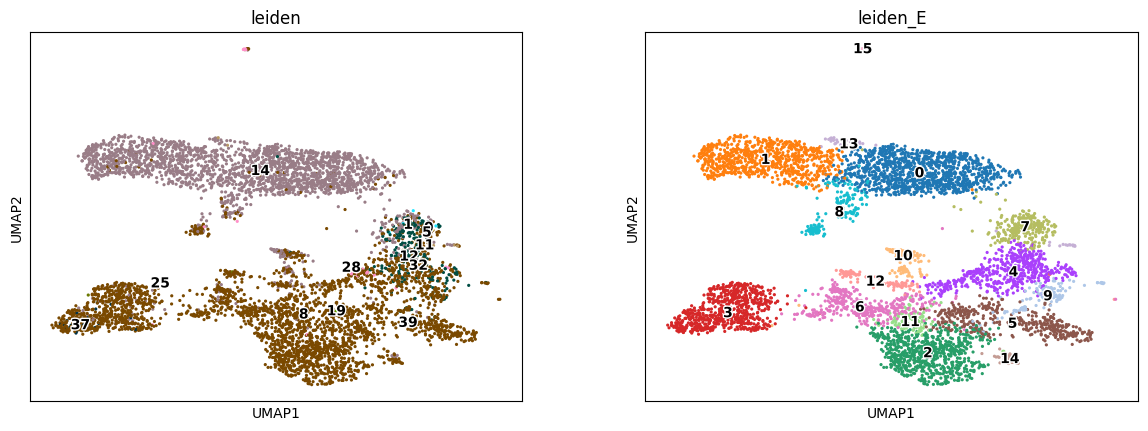

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


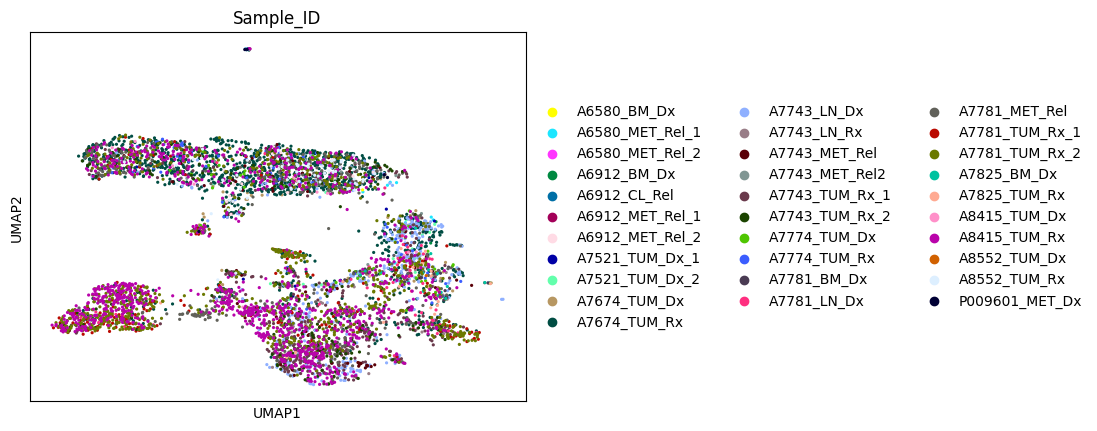

In [90]:
sc.tl.leiden(fdata3, key_added="leiden_E")
sc.pl.umap(
    fdata3, color=["leiden", "leiden_E"], legend_fontoutline=2, legend_loc="on data"
)
sc.pl.umap(fdata3, color=["Sample_ID"])

In [12]:
fdata3.write("fibro_subset03.2.h5ad")

In [91]:
sc.tl.rank_genes_groups(fdata3, groupby="leiden_E", method="wilcoxon")

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in

In [ ]:
sc.tl.dendrogram(fdata3, markers, groupby='leiden_E', dendrogram=True))

In [92]:
sc.pl.rank_genes_groups_dotplot(
    fdata3, n_genes=5, min_logfoldchange=0.5, standard_scale="var", color_map="viridis"
)

ValueError: Incompatible observations. Dendrogram data has 20 categories but current groupby observation ['leiden_E'] contains 16 categories. Most likely the underlying groupby observation changed after the initial computation of `sc.tl.dendrogram`. Please run `sc.tl.dendrogram` again.'